In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from keras.utils import to_categorical

In [2]:
train_df = pd.read_csv('Digit_train.csv')
test_df = pd.read_csv('Digit_test.csv')

In [3]:
train_df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
train_df['label'].unique()

array([1, 0, 4, 7, 3, 5, 8, 9, 2, 6])

In [6]:
print(train_df.shape, test_df.shape)

(42000, 785) (28000, 784)


In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [8]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Columns: 784 entries, pixel0 to pixel783
dtypes: int64(784)
memory usage: 167.5 MB


In [9]:
count = train_df['label'].value_counts()

In [10]:
count

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


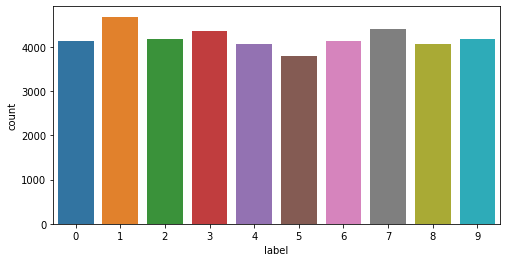

In [11]:
plt.figure(figsize=(8,4))
sns.countplot(train_df['label'])
plt.show()

In [12]:
y_train = train_df['label']
train_df = train_df.drop(labels=['label'], axis=1)
X_train = train_df.values.reshape(-1,28,28,1)
X_train = X_train/255
y_train = to_categorical(y_train, num_classes=10)
print(X_train.shape, y_train.shape)

(42000, 28, 28, 1) (42000, 10)


In [13]:
X_test = (test_df.values.reshape(-1,28,28,1))/255

print(X_test.shape)

(28000, 28, 28, 1)


[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


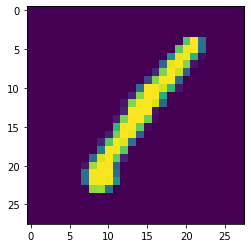

In [14]:
## Display first images
plt.imshow(X_train[0][:,:,0])
print(y_train[0])

# Model

In [15]:
import tensorflow as tf

from tensorflow.keras import layers, models


model = models.Sequential()

# adding CNN layers to the model

model.add(layers.Conv2D(32, (5,5),padding = 'Same', activation ='relu', input_shape = (28,28,1)))
model.add(layers.Conv2D(32, (5,5),padding = 'Same', activation ='relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Dropout(0.5))

model.add(layers.Conv2D(64, (3,3),padding = 'Same', activation ='relu'))
model.add(layers.Conv2D(64, (3,3),padding = 'Same', activation ='relu'))
model.add(layers.MaxPool2D((2,2), strides=(2,2)))
model.add(layers.Dropout(0.5))

# adding Decision Layers

model.add(layers.Flatten())
model.add(layers.Dense(256, activation = "relu"))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation = "softmax"))


In [16]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        832       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        25632     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0

In [19]:
Classifier = model.fit(X_train, y_train, epochs=20, batch_size=64, shuffle=True)

Epoch 1/20
657/657 [==============================] - 250s 380ms/step - loss: 0.0261 - accuracy: 0.9921
Epoch 2/20
657/657 [==============================] - 250s 380ms/step - loss: 0.0259 - accuracy: 0.9924
Epoch 3/20
657/657 [==============================] - 249s 380ms/step - loss: 0.0258 - accuracy: 0.9917
Epoch 4/20
657/657 [==============================] - 250s 380ms/step - loss: 0.0260 - accuracy: 0.9918
Epoch 5/20
657/657 [==============================] - 249s 379ms/step - loss: 0.0252 - accuracy: 0.9921
Epoch 6/20
657/657 [==============================] - 250s 380ms/step - loss: 0.0255 - accuracy: 0.9920
Epoch 7/20
657/657 [==============================] - 250s 380ms/step - loss: 0.0245 - accuracy: 0.9926
Epoch 8/20
657/657 [==============================] - 250s 380ms/step - loss: 0.0268 - accuracy: 0.9919
Epoch 9/20
657/657 [==============================] - 250s 381ms/step - loss: 0.0223 - accuracy: 0.9933
Epoch 10/20
657/657 [==============================] - 250s 380m

In [20]:
predict = model.predict(X_test)
y_test = [np.argmax(pred) for pred in predict]

In [22]:
submission = pd.DataFrame({'ImageId' : [i+1 for i in range(len(y_test))] , 'Label' : y_test})
submission.to_csv('./submission.csv', index = False)